In [1]:
from agents import Agent, RandomAgent, HumanInput, EndAgent, RLAgent
from states import GameState, TOAD, FROG, BLANK
from game import run_game_loop, simulate_many_games, plot_losses

import random as rand
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch
import matplotlib.pyplot as plt
import time


In [2]:
initial_position = [TOAD] * 6 + [BLANK] * 9 + [FROG] * 6
G = GameState(initial_position, starting_player=TOAD)

In [3]:
rl_agent = RLAgent(G, TOAD, agent_name='toad_rl', filename='toad_rl696improved', batch_size=128, lr=1e-4, target_update_freq=20)
# rl_agent.load_checkpoint('toad_rl333.pth')
random_frog = RandomAgent(G, FROG)

Training toad_rl 0.0% complete...
Training toad_rl 1.0% complete...
Training toad_rl 2.0% complete...
Training toad_rl 3.0% complete...
Training toad_rl 4.0% complete...
Training toad_rl 5.0% complete...
Training toad_rl 6.0% complete...
Training toad_rl 7.0% complete...
Training toad_rl 8.0% complete...
Training toad_rl 9.0% complete...
Training toad_rl 10.0% complete...
Training toad_rl 11.0% complete...
Training toad_rl 12.0% complete...
Training toad_rl 13.0% complete...
Training toad_rl 14.0% complete...
Training toad_rl 15.0% complete...
Training toad_rl 16.0% complete...
Training toad_rl 17.0% complete...
Training toad_rl 18.0% complete...
Training toad_rl 19.0% complete...
Training toad_rl 20.0% complete...
Training toad_rl 21.0% complete...
Training toad_rl 22.0% complete...
Training toad_rl 23.0% complete...
Training toad_rl 24.0% complete...
Training toad_rl 25.0% complete...
Training toad_rl 26.0% complete...
Training toad_rl 27.0% complete...
Training toad_rl 28.0% complet

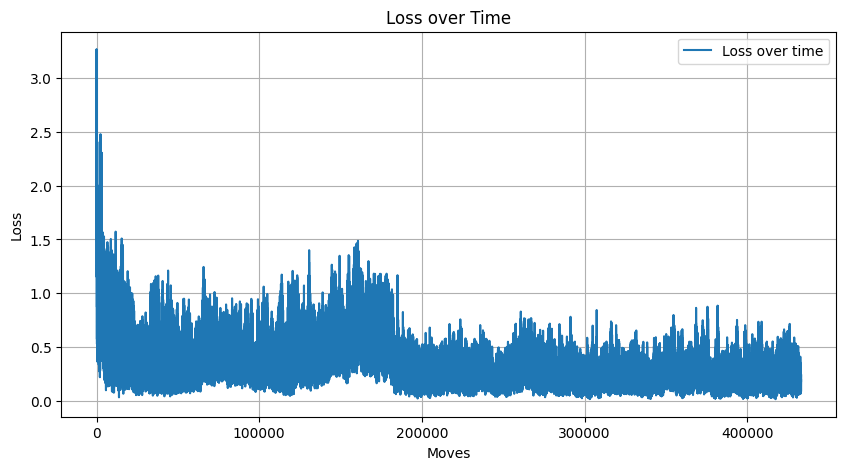

In [4]:
losses = rl_agent.train(opponent=random_frog, num_episodes=20000, save_model=True, start_epsilon=0.5, end_epsilon=0)
plot_losses(losses)

Toads won 642 games (64.2%)
Frogs won 358 games (35.8%)


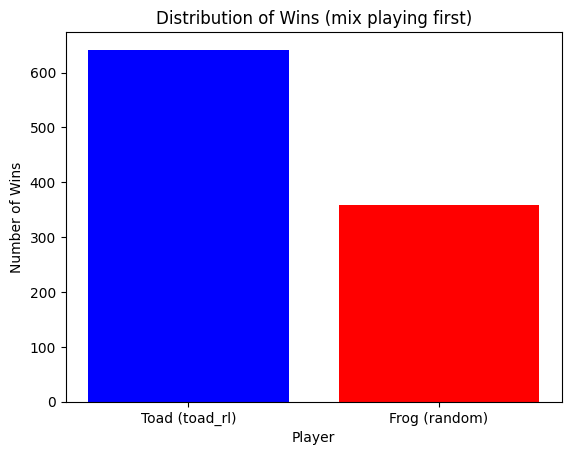

In [7]:
num_games = 1000
starting_player = 'mix'
results = simulate_many_games(num_games, G, rl_agent, random_frog,
                                starting_player=starting_player, verbose=False, plot=True)

In [7]:
run_game_loop(G, rl_agent, random_frog, verbose=True)

Initializing game between toad_rl as Toads and random as Frogs...
|T|T|T| | | |F|F|F|
toad_rl makes move 1
|T|T| |T| | |F|F|F|
random makes move 1
|T|T| |T| |F| |F|F|
toad_rl makes move 1
|T|T| | |T|F| |F|F|
random makes move 1
|T|T| |F|T| | |F|F|
toad_rl makes move 2
|T| |T|F|T| | |F|F|
random makes move 1
|T|F|T| |T| | |F|F|
toad_rl makes move 2
|T|F| |T|T| | |F|F|
random makes move 2
|T|F| |T|T| |F| |F|
toad_rl makes move 1
|T|F| |T| |T|F| |F|
random makes move 2
|T|F| |T|F|T| | |F|
toad_rl makes move 3
| |F|T|T|F|T| | |F|
random makes move 1
|F| |T|T|F|T| | |F|
toad_rl makes move 1
|F| |T|T|F| |T| |F|
random makes move 3
|F| |T|T|F| |T|F| |
toad_rl makes move 2
|F| |T| |F|T|T|F| |
random makes move 2
|F| |T|F| |T|T|F| |
toad_rl makes move 1
|F| |T|F| |T| |F|T|
random makes move 2
|F|F|T| | |T| |F|T|
toad_rl makes move 3
|F|F| |T| |T| |F|T|
random makes move 3
|F|F| |T| |T|F| |T|
toad_rl makes move 2
|F|F| |T| | |F|T|T|
random makes move 3
|F|F| |T| |F| |T|T|
toad_rl makes move 3
|F

True

# I play the trained agent

In [8]:
me = HumanInput(G, FROG, 'logan')
run_game_loop(G, rl_agent, me, verbose=True)

Initializing game between toad_rl as Toads and logan as Frogs...
|T|T|T|T|T|T| | | | | | | | | |F|F|F|F|F|F|
tensor([[ -0.6635,  -2.2042, -10.6080, -13.0324, -15.9726, -17.6946]])
1
toad_rl makes move 1
|T|T|T|T|T| |T| | | | | | | | |F|F|F|F|F|F|
logan makes move 1
|T|T|T|T|T| |T| | | | | | | |F| |F|F|F|F|F|
tensor([[ -0.8160,  -2.9871, -11.7733, -14.2789, -16.9412, -17.8098]])
1
toad_rl makes move 1
|T|T|T|T|T| | |T| | | | | | |F| |F|F|F|F|F|
logan makes move 1
|T|T|T|T|T| | |T| | | | | |F| | |F|F|F|F|F|
tensor([[ -0.9610,  -2.2255, -11.6651, -12.7880, -15.5537, -14.9748]])
1
toad_rl makes move 1
|T|T|T|T|T| | | |T| | | | |F| | |F|F|F|F|F|
logan makes move 1
|T|T|T|T|T| | | |T| | | |F| | | |F|F|F|F|F|
tensor([[ -1.2239,  -2.7630,  -8.9816, -12.4077, -16.5029, -17.4739]])
1
toad_rl makes move 1
|T|T|T|T|T| | | | |T| | |F| | | |F|F|F|F|F|
logan makes move 1
|T|T|T|T|T| | | | |T| |F| | | | |F|F|F|F|F|
tensor([[ -1.6524,  -2.8215, -11.1885, -15.4742, -18.4701, -17.8852]])
1
toad_rl makes 

False

It beat me...

# Train a Frog agent for the same amount of time against a random opponent

In [4]:
H = GameState(initial_position, FROG)

In [5]:
rl_agent2 = RLAgent(H, TOAD, agent_name='frog_rl', filename='frog_rl464_DL.pth', batch_size=128, lr=1e-4, target_update_freq=20)
random_toad = RandomAgent(H, TOAD)

Training frog_rl 0.0% complete...
Training frog_rl 1.0% complete...
Training frog_rl 2.0% complete...
|F| | | |T|T|F| |T|F|F| | |T|
Training frog_rl 3.0% complete...
Training frog_rl 4.0% complete...
| | |T|T|F|F|F| | | |T|T|F| |
Training frog_rl 5.0% complete...
| |T|F| |T|F|F| | | |T|T|F| |
| | |T|T|F|F|F| | | |T|T|F| |
| | |T|T|F|F|F| | | |T|T|F| |
Training frog_rl 6.0% complete...
| |T|F| |T|F|F|F| | | | |T|T|
Training frog_rl 7.0% complete...
| |T|F| |T|F|F|F| | | | |T|T|
Training frog_rl 8.0% complete...
| | |T|T|F|F|F| | | |T|T|F| |
Training frog_rl 9.0% complete...
| | |T|T|F|F|F| | | |T|T|F| |
| | |T|T|F|F|F| | | |T|T|F| |
Training frog_rl 10.0% complete...
| | |T|T|F|F|F| | | |T|T|F| |
| | |T|T|F|F|F| | | |T|T|F| |
| | |T|T|F|F|F| | | |T|T|F| |
| | |T|T|F|F|F| | | |T|T|F| |
Training frog_rl 11.0% complete...
| | |T|T|F|F|F| | | |T|T|F| |
| | |T|T|F|F|F| | | |T|T|F| |
| | |T|T|F|F|F| | | |T|T|F| |
Training frog_rl 12.0% complete...
| |T|F| |T|F|F|F| | | | |T|T|
| | |T|T|F|F|F|

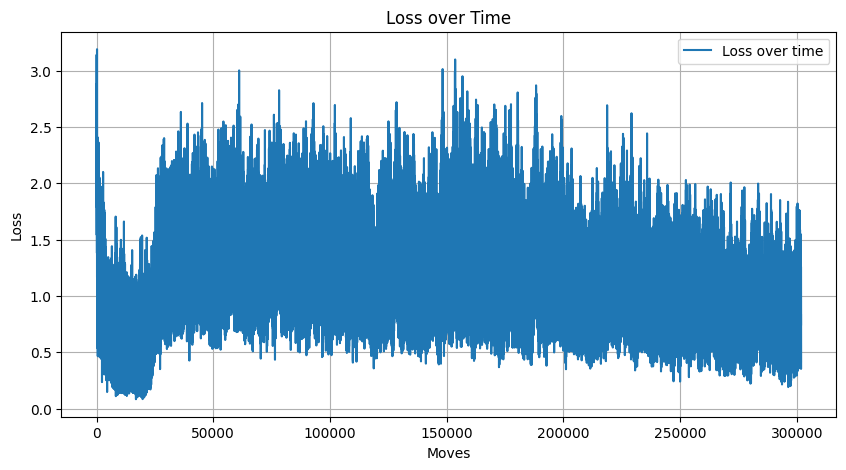

In [6]:
losses2 = rl_agent2.train(opponent=random_toad, num_episodes=20000, start_epsilon=0.5, end_epsilon=0)
plot_losses(losses2)

Toads won 526 games (52.6%)
Frogs won 474 games (47.4%)


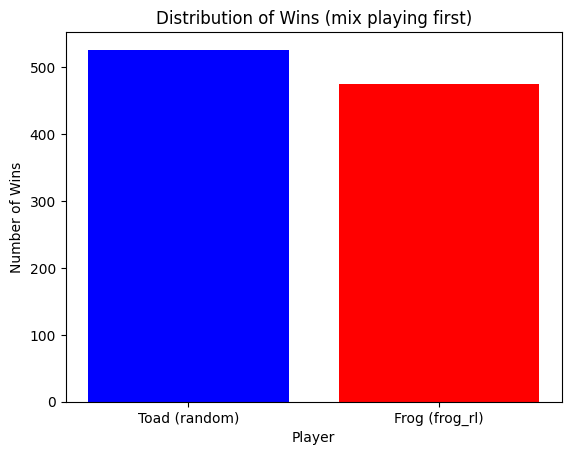

In [7]:
num_games = 1000
starting_player = 'mix'
results = simulate_many_games(num_games, H, random_toad, rl_agent2,
                                starting_player=starting_player, verbose=False, plot=True)

In [8]:
run_game_loop(H, random_toad, rl_agent2, verbose=True)

Initializing game between random as Toads and frog_rl as Frogs...
|T|T|T|T| | | | | | |F|F|F|F|
random makes move 1
|T|T|T|T| | | | | |F| |F|F|F|
frog_rl makes move 1
|T|T|T| |T| | | | |F| |F|F|F|
random makes move 1
|T|T|T| |T| | | |F| | |F|F|F|
frog_rl makes move 1
|T|T|T| | |T| | |F| | |F|F|F|
random makes move 1
|T|T|T| | |T| |F| | | |F|F|F|
frog_rl makes move 1
|T|T|T| | | |T|F| | | |F|F|F|
random makes move 1
|T|T|T| | |F|T| | | | |F|F|F|
frog_rl makes move 1
|T|T|T| | |F| |T| | | |F|F|F|
random makes move 1
|T|T|T| |F| | |T| | | |F|F|F|
frog_rl makes move 2
|T|T| |T|F| | |T| | | |F|F|F|
random makes move 1
|T|T|F|T| | | |T| | | |F|F|F|
frog_rl makes move 2
|T|T|F| |T| | |T| | | |F|F|F|
random makes move 2
|T|T|F| |T| | |T| | |F| |F|F|
frog_rl makes move 1
|T|T|F| |T| | | |T| |F| |F|F|
random makes move 2
|T|T|F| |T| | | |T|F| | |F|F|
frog_rl makes move 3
|T| |F|T|T| | | |T|F| | |F|F|
random makes move 1
|T|F| |T|T| | | |T|F| | |F|F|
frog_rl makes move 1
|T|F| |T|T| | | | |F|T| |

False

In [12]:
DeathLeapBoard = GameState([-1, 0, 1, -1, 1, 1, 1, -1, 0, -1, 0, 0, 0, 0], FROG)
rl_agent2.choose_move(DeathLeapBoard, verbose=True)

tensor([[-12.3524, -49.3776, -91.8866, -63.7331]])
1


4

# Train new models by playing the previously trained ones

In [6]:
toad_self_play = RLAgent(G, TOAD, 'toad_self_play', 'toad_self_696', lr=1e-4, batch_size=128, target_update_freq=20)
toad_self_play.load_checkpoint('toad_rl696.pth')
frog_self_play = RLAgent(H, FROG, 'frog_self_play', 'frog_self_696', lr=1e-4, batch_size=128, target_update_freq=20)
frog_self_play.load_checkpoint('frog_rl696.pth')

toad_first = run_game_loop(G, rl_agent, rl_agent2, verbose=True)
frog_first = run_game_loop(H, rl_agent, rl_agent2, verbose=True)
print("toad_first", toad_first)
print("frog_first", frog_first)

Initializing game between toad_rl as Toads and frog_rl as Frogs...
|T|T|T|T|T|T| | | | | | | | | |F|F|F|F|F|F|
toad_rl makes move 1
|T|T|T|T|T| |T| | | | | | | | |F|F|F|F|F|F|
frog_rl makes move 1
|T|T|T|T|T| |T| | | | | | | |F| |F|F|F|F|F|
toad_rl makes move 2
|T|T|T|T| |T|T| | | | | | | |F| |F|F|F|F|F|
frog_rl makes move 1
|T|T|T|T| |T|T| | | | | | |F| | |F|F|F|F|F|
toad_rl makes move 1
|T|T|T|T| |T| |T| | | | | |F| | |F|F|F|F|F|
frog_rl makes move 2
|T|T|T|T| |T| |T| | | | | |F| |F| |F|F|F|F|
toad_rl makes move 3
|T|T|T| |T|T| |T| | | | | |F| |F| |F|F|F|F|
frog_rl makes move 2
|T|T|T| |T|T| |T| | | | | |F|F| | |F|F|F|F|
toad_rl makes move 1
|T|T|T| |T|T| | |T| | | | |F|F| | |F|F|F|F|
frog_rl makes move 1
|T|T|T| |T|T| | |T| | | |F| |F| | |F|F|F|F|
toad_rl makes move 2
|T|T|T| |T| |T| |T| | | |F| |F| | |F|F|F|F|
frog_rl makes move 2
|T|T|T| |T| |T| |T| | | |F|F| | | |F|F|F|F|
toad_rl makes move 1
|T|T|T| |T| |T| | |T| | |F|F| | | |F|F|F|F|
frog_rl makes move 3
|T|T|T| |T| |T| | |T| |

toad_self_play losses for epoch 0


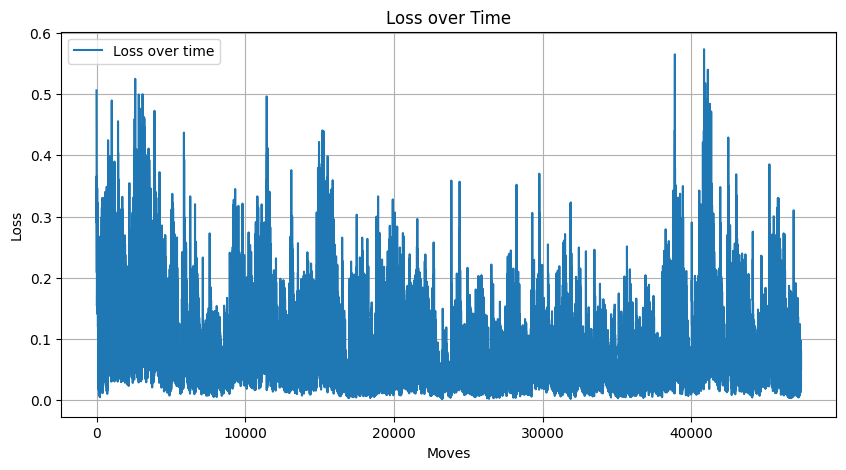

frog_self_play losses for epoch 0


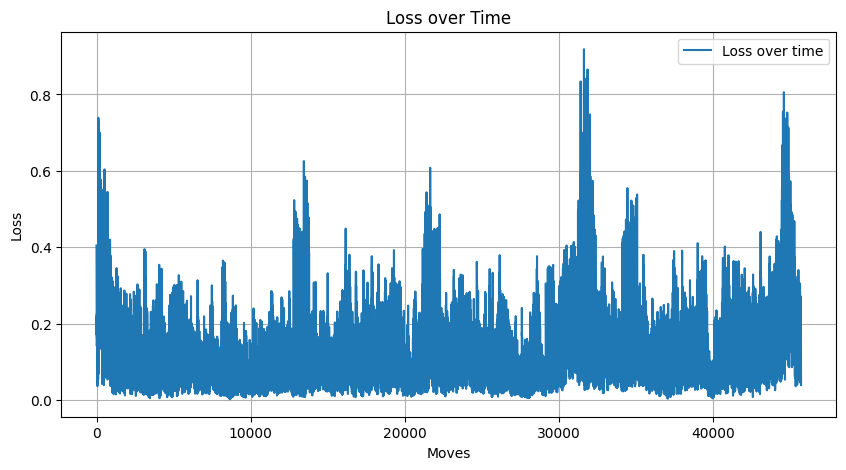

toad_self_play losses for epoch 1


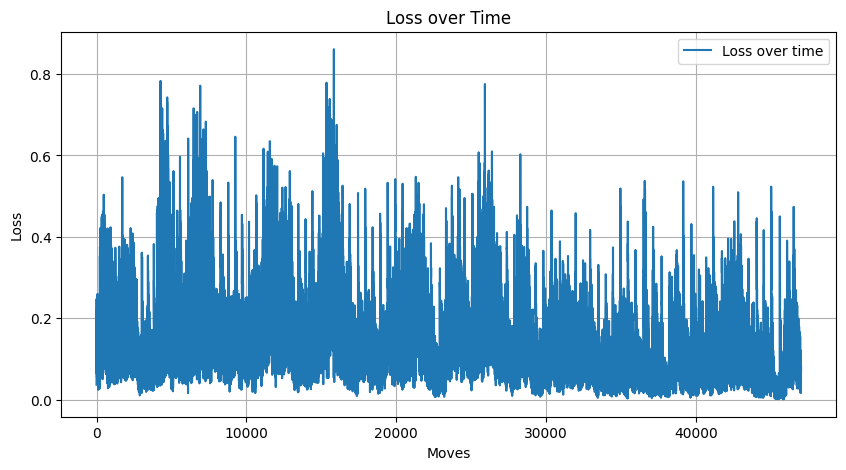

frog_self_play losses for epoch 1


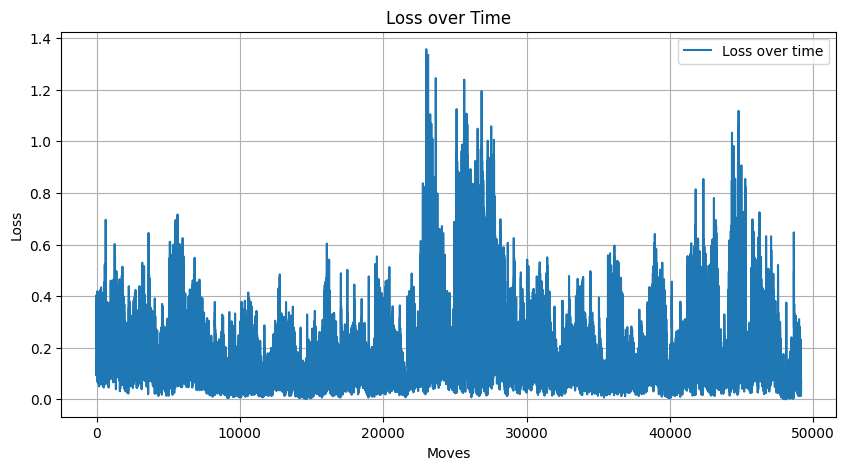

toad_self_play losses for epoch 2


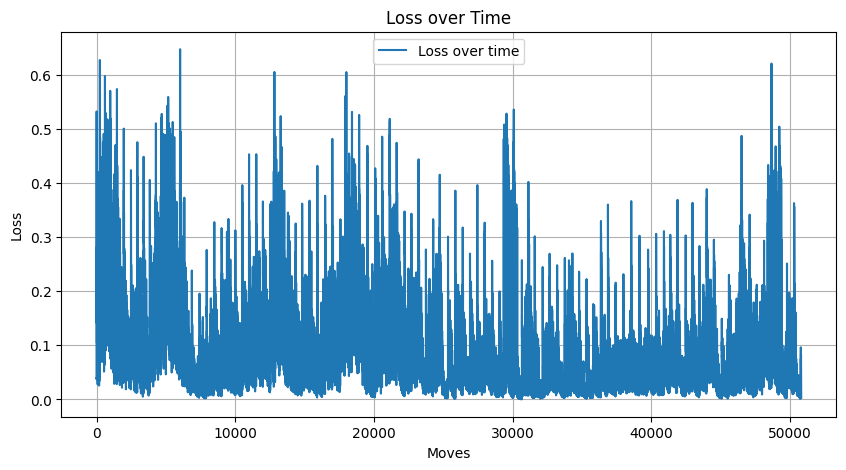

frog_self_play losses for epoch 2


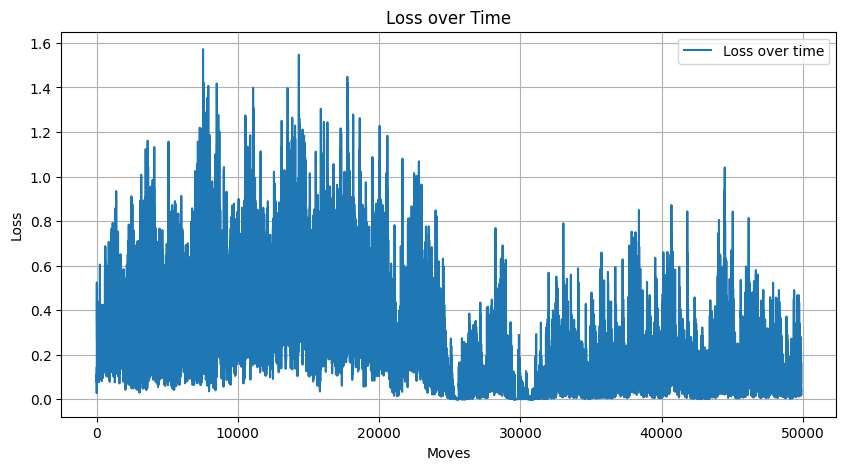

toad_self_play losses for epoch 3


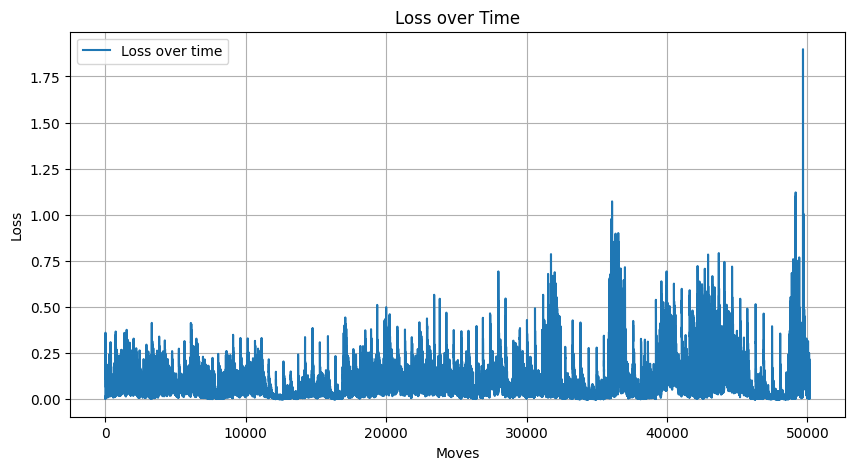

frog_self_play losses for epoch 3


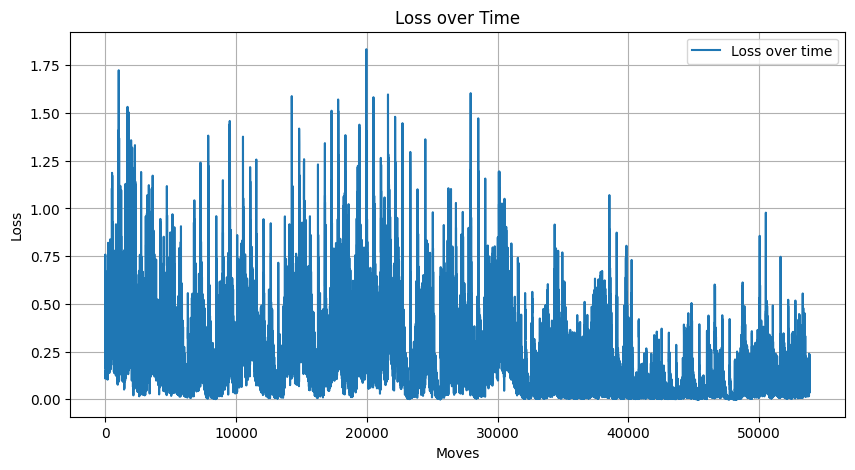

toad_self_play losses for epoch 4


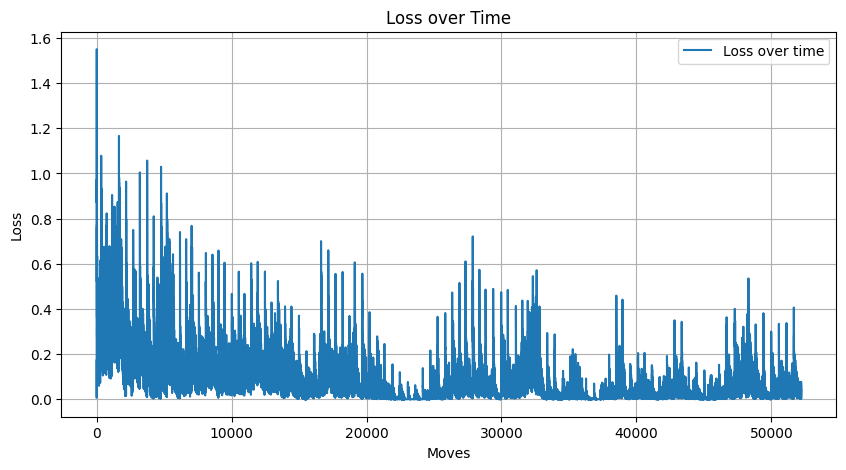

frog_self_play losses for epoch 4


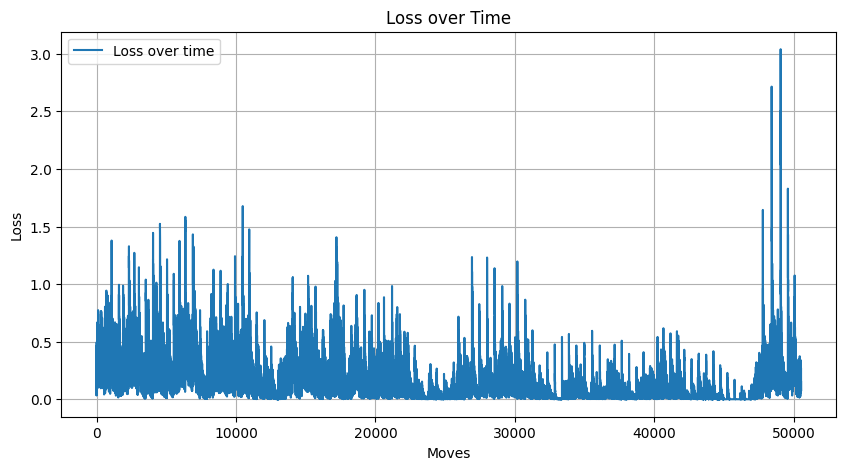

In [7]:
num_epochs = 5
# an epoch is a training session of both toad and frog
for epoch in range(num_epochs):
    losses = toad_self_play.train(opponent=frog_self_play, num_episodes=2000, save_model=True, start_epsilon=0.5 / (epoch + 1), end_epsilon=0, verbose=False)
    print(f"{toad_self_play.agent_name} losses for epoch {epoch}")
    plot_losses(losses)

    losses2 = frog_self_play.train(opponent=toad_self_play, num_episodes=2000, start_epsilon=0.5 / (epoch + 1), end_epsilon=0, verbose=False)
    print(f"{frog_self_play.agent_name} losses for epoch {epoch}")
    plot_losses(losses2)
    

Toads won 141 games (14.1%)
Frogs won 859 games (85.9%)


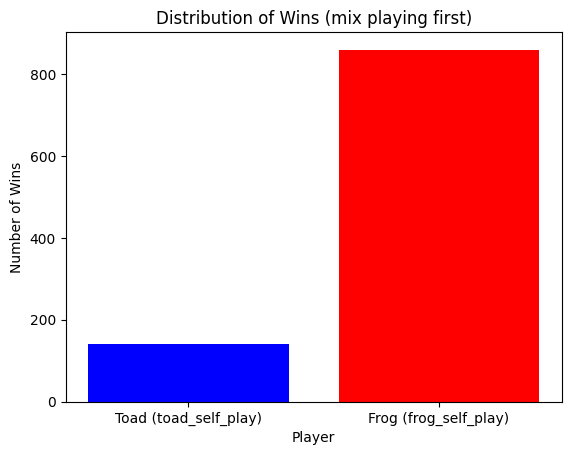

In [15]:
num_games = 1000
starting_player = 'mix'
results = simulate_many_games(num_games, G, toad_self_play, frog_self_play,
                                starting_player=starting_player, verbose=False, plot=True)

Toads won 403 games (40.3%)
Frogs won 597 games (59.7%)


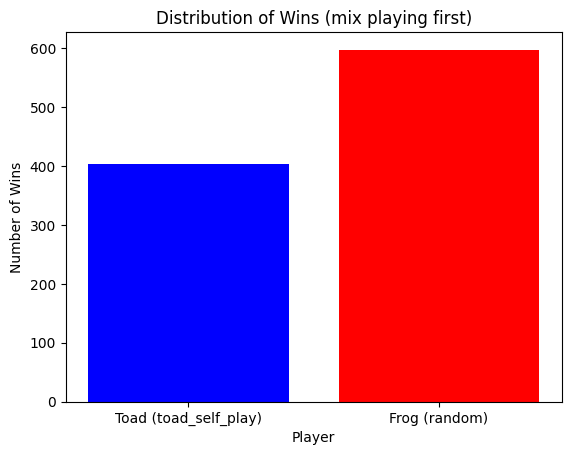

In [16]:
num_games = 1000
starting_player = 'mix'
results = simulate_many_games(num_games, G, toad_self_play, random_frog,
                                starting_player=starting_player, verbose=False, plot=True)

Toads won 353 games (35.3%)
Frogs won 647 games (64.7%)


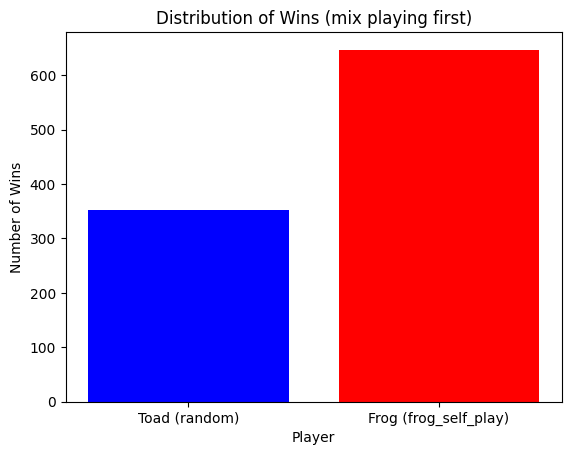

In [19]:
num_games = 1000
starting_player = 'mix'
results = simulate_many_games(num_games, H, random_toad, frog_self_play,
                                starting_player=starting_player, verbose=False, plot=True)

In [18]:
run_game_loop(G, toad_self_play, random_frog)

Initializing game between toad_self_play as Toads and random as Frogs...
|T|T|T|T|T|T| | | | | | | | | |F|F|F|F|F|F|
toad_self_play makes move 1
|T|T|T|T|T| |T| | | | | | | | |F|F|F|F|F|F|
random makes move 1
|T|T|T|T|T| |T| | | | | | | |F| |F|F|F|F|F|
toad_self_play makes move 1
|T|T|T|T|T| | |T| | | | | | |F| |F|F|F|F|F|
random makes move 2
|T|T|T|T|T| | |T| | | | | | |F|F| |F|F|F|F|
toad_self_play makes move 1
|T|T|T|T|T| | | |T| | | | | |F|F| |F|F|F|F|
random makes move 3
|T|T|T|T|T| | | |T| | | | | |F|F|F| |F|F|F|
toad_self_play makes move 2
|T|T|T|T| |T| | |T| | | | | |F|F|F| |F|F|F|
random makes move 1
|T|T|T|T| |T| | |T| | | | |F| |F|F| |F|F|F|
toad_self_play makes move 1
|T|T|T|T| |T| | | |T| | | |F| |F|F| |F|F|F|
random makes move 4
|T|T|T|T| |T| | | |T| | | |F| |F|F|F| |F|F|
toad_self_play makes move 1
|T|T|T|T| |T| | | | |T| | |F| |F|F|F| |F|F|
random makes move 5
|T|T|T|T| |T| | | | |T| | |F| |F|F|F|F| |F|
toad_self_play makes move 1
|T|T|T|T| |T| | | | | |T| |F| |F|F|F|F|

True

In [20]:
me = HumanInput(G, FROG, 'logan')
run_game_loop(G, toad_self_play, me)

Initializing game between toad_rl as Toads and logan as Frogs...
|T|T| | | | |F|F|
toad_rl makes move 1
|T| |T| | | |F|F|
logan makes move 1
|T| |T| | |F| |F|
toad_rl makes move 2
| |T|T| | |F| |F|
logan makes move 1
| |T|T| |F| | |F|
toad_rl makes move 1
| |T| |T|F| | |F|
logan makes move 2
| |T| |T|F| |F| |
toad_rl makes move 1
| |T| | |F|T|F| |
logan makes move 1
| |T| |F| |T|F| |
toad_rl makes move 2
| | |T|F| |T|F| |
logan makes move 1
| |F|T| | |T|F| |
toad_rl makes move 1
| |F|T| | | |F|T|
logan makes move 2
| |F|T| | |F| |T|
toad_rl makes move 2
| |F| |T| |F| |T|
logan makes move 2
| |F| |T|F| | |T|
toad_rl makes move 2
| |F| | |F|T| |T|
logan makes move 1
|F| | | |F|T| |T|
toad_rl makes move 2
|F| | | |F| |T|T|
logan makes move 2
|F| | |F| | |T|T|
logan playing as Frogs wins in 18 moves!


False

For some reason the agents playing against each other became worse than random.